# Sistemas Discretos
## Diagrama de bifurcación del mapeo logístico discreto

Sea $$f(x)= ax(1-x)$$
con $x\in[0,1]$.

La relación de recurrencia discreta esta dada por $$x_{n+1}=ax_n(1-x_n)$$
Tomamos $a \in [0, 4]$ y graficamos el diagrama de bifurcación.

In [1]:
import numpy as np
import itertools as itert
import matplotlib.pyplot as plt

## Función para encontrar punto fijo con cierto x_0 y cierta a
def punto_fijo_logistica2(a, puntos):
    x = [0.4] # p_inicial
    err = 0.00001 # nos indica si hay menos de esta diferencia entre dos puntos, los tomamos iguales
    logistic = lambda x: (a*x)*(1-x) #mapeo logistico
    rep = 3000 ## máximo de veces que podemos iterar para encontrar los puntos fijos
    for i in range(0, rep): 
        x.append(logistic(x[-1])) #aplicamos la función a X_0, N veces
        if i> puntos+1 and abs(x[-1-puntos]-x[-1]) < err: ## si encontramos una repetición de cierto ciclo, terminamos
            break
    if i==rep-1: # si al final no hubo repetición del ciclo indicado, agregamos un punto fijo
        puntos += 1
    x_0 = x[-puntos:] ## estos son los puntos fijos
    return [x_0, puntos] #regresamos x_0 y la cantidad de puntos fijos

In [2]:
delta = 0.0005 ## cambios en a
a_list = np.arange(0, 4, delta) ## variable de bifurcacion a con espaciamiento delta
puntos_fij = 1 # comenzamos con un punto fijo
p_fijos = [] # Aquí guardamos los puntos fijos por cada a
ind = [] ## aquí guardamos las repeticiones de a para cada punto fijo
for a in a_list:
    [x_0, puntos_fij] = punto_fijo_logistica2(a, puntos_fij) # encontramos puntos fijos
    p_fijos.append(x_0) #los guardamos aquí
    ind.append(list(itert.repeat(a, len(p_fijos[-1])))) # guardamos tantas repeticiones de a, como puntos fijos de este valor


listo


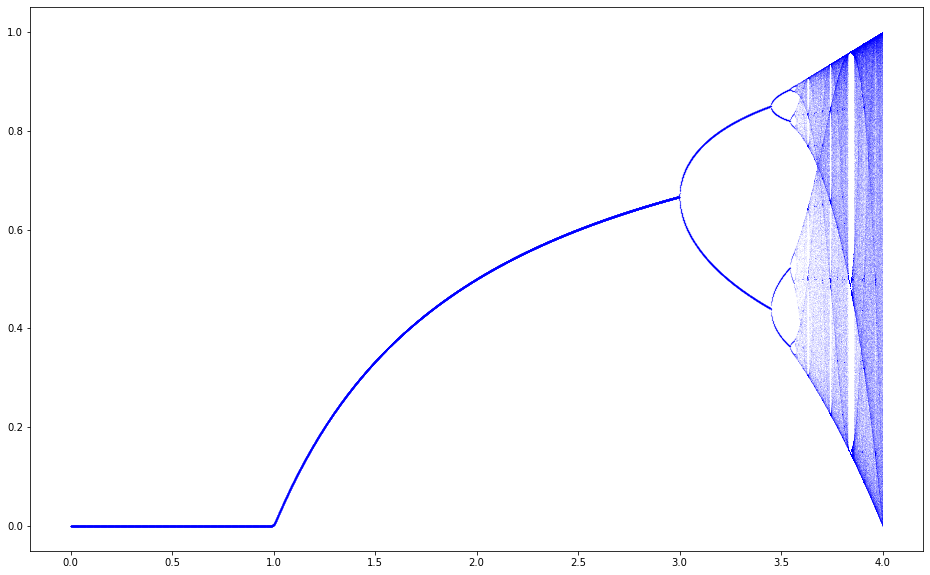

In [3]:
#####graficamos
plt.rcParams["figure.figsize"]=16,10
i = 1
for p, a  in zip(p_fijos, ind):
    size = max(i/len(p), 0.025) #hacemos cada vez más pequeño el tamaño de los puntos
    plt.plot(a, p, 'b.', markersize=size) 

print('listo')

Si nos acercamos un poco más, podemos notar el patron fractal de los puntos fijos. Para $a\in [2.5, 4]$ vemos

listo


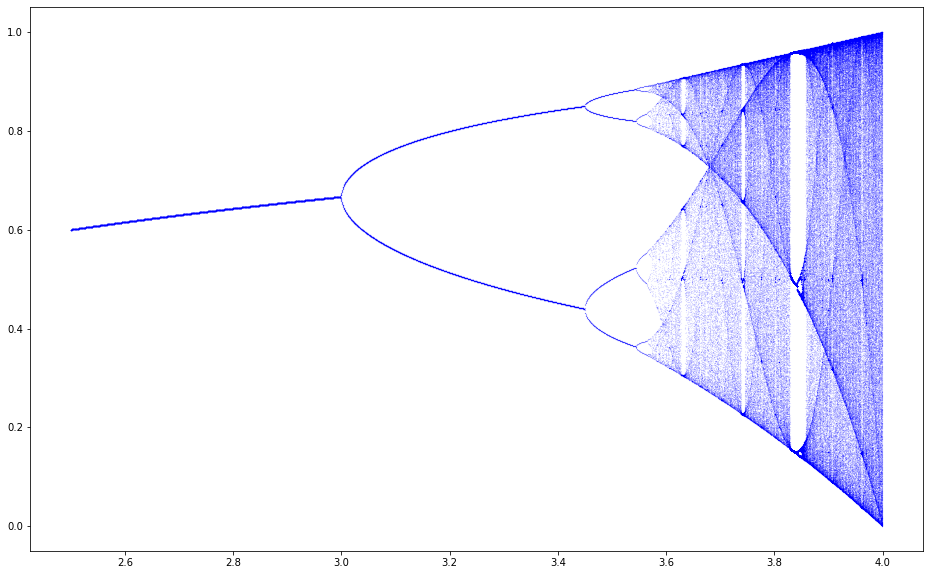

In [4]:
plt.rcParams["figure.figsize"]=16,10
i = 1
for p, a  in zip(p_fijos, ind):
    if a[0]>= 2.5:
        size = max(i/len(p), 0.06) 
        plt.plot(a, p, 'b.', markersize=size) 

print('listo')

Otro acercamiento en $a \in [3.5, 4]$

listo


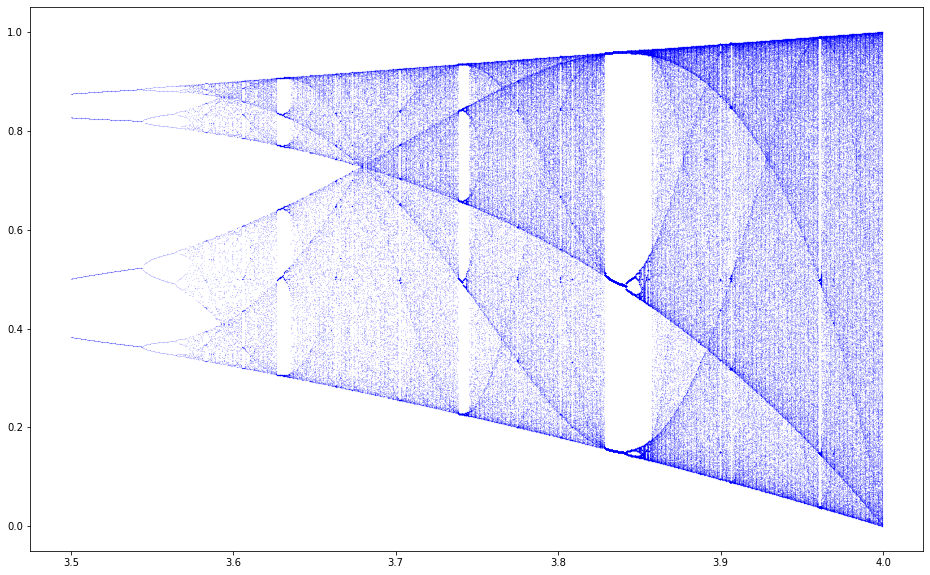

In [5]:
plt.rcParams["figure.figsize"]=16,10
i = 1
for p, a  in zip(p_fijos, ind):
    if a[0]>= 3.5:
        size = max(i/len(p), 0.1) 
        plt.plot(a, p, 'b.', markersize=size) 

print('listo')

## Conjunto de Mandelbrot

Dado un número $c \in \mathbb{C}$, definimos la sucesión $\lbrace z_i \rbrace_{i\in \mathbb{N}}$ con $z_i$ en los números complejos (para toda $i$), definida como
$$ \begin{array}{lr}
z_0 = 0 \\
z_{n+1} = z^2_n + c
\end{array}$$

Decimos que $c$ es un punto del conjunto de Mandelbrot ($c \in M$), si y solo si la sucesión  $\lbrace z_i \rbrace_{i\in \mathbb{N}}$  está acotada.

In [6]:
## función que nos indica si un número c está en el conjunto de Mandelbrot
def isin_mandelbrot(c):
    z = 0 # punto inicial
    rep = 100 # repeticiones máximas
    cota = 20 # la cota que nos limita si está o no en el conjunto un punto
    mand = lambda x : x**2 + c ## mapeo de mandelbrot
    for i in range(0, rep):
        z = mand(z) #aplicamos la función
        if abs(z)>cota: ## si se sale de la cota, dejamos de iterar
            break
    if abs(z) < cota: # si no se salió de la cota, es un punto de mandelbrot, no lo es en otro caso
        return True
    else:
        return False

In [7]:
## calculamos los puntos
delta_c = 0.0009 #definimos este espaciamiento en el plano
re =  np.arange(-2, 1, delta_c) ## la parte real de los puntos que analizaremos
im =  np.arange(-1, 1, delta_c) ## la parte imaginaria de los puntos que analizaremos

x = [] # guardamos la parte real de los puntos de mandelbrot
y = []# guardamos la parte imaginaria de los puntos de mandelbrot
for r in re:
    for i in im:
        c = complex(r, i) ## este es el complejo a analizar
        if isin_mandelbrot(c): #si es de mandelbrot lo guardamos
            x.append(r)
            y.append(i)

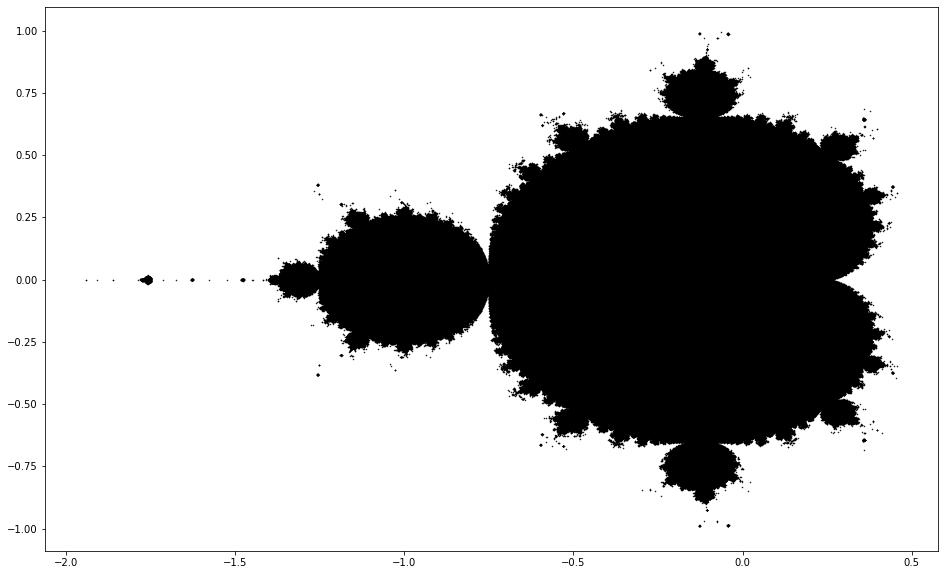

In [8]:
#graficamos
plt.rcParams["figure.figsize"]=16,10
sizec = 1
plt.plot(x, y, 'k.', markersize=sizec) 
plt.show()

## Constante de Feigenbaum

Feigenbaum se preguntó sobre la ''rapidez´´ con la que suceden las bifurcaciones en el mapeo logístico (o cualquier mapeo no-lineal). Entonces, dado el mapeo
$$x_{i+1} = f(x_i)$$
Donde $f$ es una función parametrizada por un valor de bifurcación $a$. Observó los valores $a_i$ donde suceden las bifurcaciones y calculó los radios entre ellos. Es decir, los valores
$$r_n = \frac{a_{n-1}- a_{n-2}}{a_{n}-a_{n-1}}$$
Y encontró que este radio converge a una constante

$$ \lim_{n \to \infty } r_n \approx 4.6692 $$

## Relación Mapeo logístico vs Conjunto de Mandelbrot

Al graficar el conjunto de Mandelbrot, notamos que solo estamos graficando los puntos que son parte del conjunto, es decir, solo a ellos les asignamos un color uniforme. Sin embargo, la sucesión, al estar acotada, tiene puntos de acumulación. Si nos fijamos en los puntos de acumulación del conjunto de Mandelbrot, graficando estos puntos en otro eje, es posible notar que el diagrama de bifurcación es parte de esta gráfica.

# Sistemas continuos
## Lorenz

Para modelar la dinámica de la atmósfera terrestre, Lorenz propuso un sistema de ecuaciones no lineal basandose en la transferencia de calor en un medio, considerando que 

- Si la diferencia entre las temperaturas $\Delta T$ es pequeña, entonces habrá una variación lineal de la temperatura con la altura, pero sin movimiento significativo de la capa de fluidos.

- Si $\Delta T$ es suficientemente grande, entonces el aire caliente se levanta, moviendo hacia abajo el aire frio y esto da como resultado un movimiento de convección.

- Si $\Delta T$ sigue aumentando entonces el flujo de convección se transforma en movimiento turbulento más complejo.

Las ecuaciones son

$$\begin{matrix} f= \sigma (-x+y)\\ g = rx-y-xz \\ h=-bz+xy \end{matrix}$$

Se ha encoontrado que fijando $\sigma=10$ y $b=8/3$ se hallan comportamientos interesantes para ciertos valores de r.

Más abajo veremos el comportamiento de las soluciones de este sistema de ecuaciones para un valor $r=28$ y dos condiciones iniciales ''cercanas´´. Pero, antes programamos el algoritmo que nos permite encontrar soluciones de forma numérica, utilizando el método de Runge-Kuta de cuarto grado.

In [9]:
"""Programa del método de Runge-Kutta"""
# Runge-Kutta algoritmo, para el sistema -> functions y valores iniciales ->variables_0 
# en el intervalo [t_0, t_n] dividido en n subintervalos de tamaño h.
def rung_kutt(functions, variables_0, t_0, t_n, n):
    h = (t_n - t_0)/n # tamaño de subintervalos
    variables_n = [variables_0] # aquí guardaremos los valores de las soluciones.
    t=[] # Aquí guardamos los valores de t.
    for _ in range(n):
        y_0 = variables_n[-1] # Cada paso depende del anterior obtenido, comenzando con los iniciales
        # calculamos k1 dado por el método de Runge-Kutta para cada función del sistema
        k1 = []
        for f in functions:
            k1.append(f(t_0, y_0)) 
        # calculamos k2 dado por el método de Runge-Kutta para cada función del sistema
        k2 = []
        for f in functions:
            k2.append(f(t_0 + (h/2), [i + (element * h / 2) for i, element in zip(y_0, k1)]))
        # calculamos k3 dado por el método de Runge-Kutta para cada función del sistema
        k3 = []
        for f in functions:
            k3.append(f(t_0 + (h/2), [i + (element * h / 2) for i, element in zip(y_0, k2)]))
        # calculamos k4 dado por el método de Runge-Kutta para cada función del sistema
        k4 = []
        for f in functions:
            k4.append(f(t_0 + h, [i + (element * h) for i, element in zip(y_0, k3)]))
        # calculamos el valor de la solución para cada variable dado por el método de Runge-kutta.
        y_n = []
        for i, k in zip(y_0, zip(k1,k2,k3,k4)):
            y_n.append(i + (1/6)*(k[0]+ (2*k[1]) + (2*k[2])+ k[3])*h)
        # guardamos el valor de las variables en el tiempo t_0 + ih
        variables_n.append(y_n)    
        t.append(t_0)
        t_0 = t_0 + h
    t.append(t_0)
    # los valores solución se guardaron como columnas, pero nos conviene ponerlos como columna
    variables_n = np.ndarray.tolist(np.array(variables_n).T)
    return [t, variables_n]

Ahora sí, podemos calcular las soluciones de las ecuaciones de Lorenz

In [10]:
"""Definimos las ecuaciones de Lorenz para cualesquiera parametros r, sigma y b"""
def Lorenz_eq(r, sigma, b):
    #vars -> x=vars[0], y=vars[1], z =vars[2]
    f=lambda t, vars: sigma*(-vars[0]+vars[1])  
    g=lambda t, vars: (vars[0]*r)-vars[1]-(vars[0]*vars[2])
    p=lambda t, vars: -(b*vars[2]) + (vars[0]*vars[1]) 
    return [f, g, p]

In [11]:
sigma = 10
b = 8/3
r = 28
lorenz_func = Lorenz_eq(r,sigma,b) # calculamos las funciones para sigma, b y r dados
t_0 = 0. #t inicial
t_n = 50. # t final
n = 100000 # divisiones de t

# calculamos las soluciones para valores iniciales C_1, es decir x_0 = 5, y_0 =5, z_0=5
C_1 = [5, 5, 5]
[t_1, C_n1] = rung_kutt(lorenz_func, C_1, t_0, t_n, n)

# calculamos las soluciones para valores iniciales C_1, es decir x_0 = 5, y_0 =5, z_0=5
C_2 = [5.0000001, 5, 5]
[t_2, C_n2] = rung_kutt(lorenz_func, C_2, t_0, t_n, n)

## encontramos la distancia entre C_1 y C_2
print(f'|C_1-C_2| = {sum([(i-j)**2 for i, j in zip(C_1, C_2)])**(1/2)}')

$|C_1-C_2| = 1.0000000028043132e-07$


Notamos que con valores iniciales $C_1, C_2$ con $|C_1-C_2|<1 \times 10 ^{-6}$ las soluciones, luego de cierto tiempo, son bastante diferentes, es decir, siguen una dinámica claramente distinta para las soluciones $x(t), y(t)$ y $z(t)$.

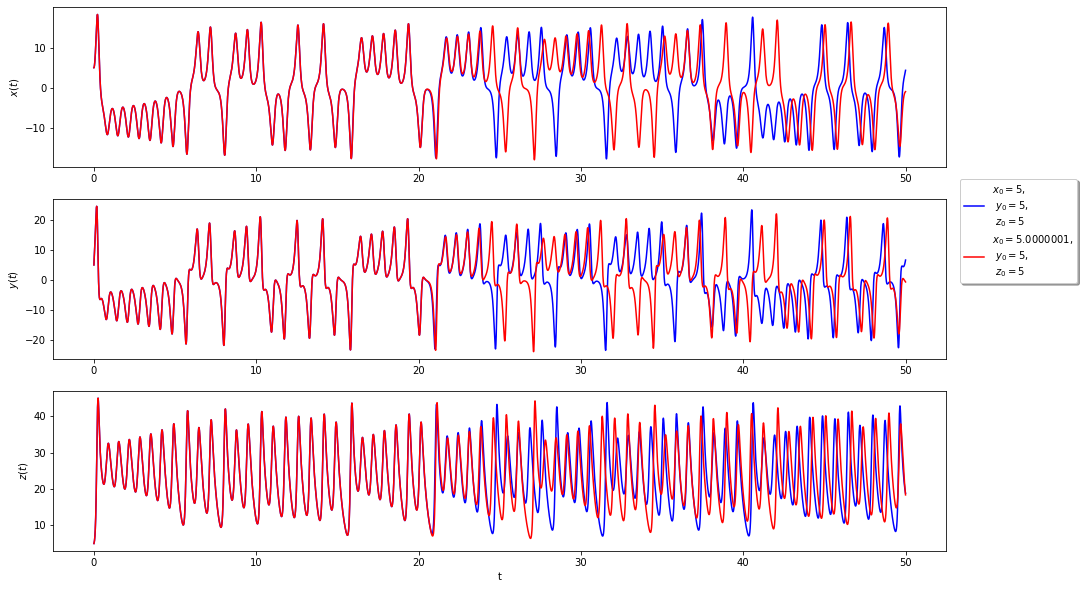

In [12]:
#graficamos
plt.rcParams["figure.figsize"]=16,10
fig, axs = plt.subplots(3)
sizec = 1

y_label = ['$x(t)$', '$y(t)$', '$z(t)$']
for i in range(0, len(axs)):
    if i != len(axs)-1:
        l_1 = '_nolegend_'
        l_2 = '_nolegend_'
    else:
        l_1 = f'$x_0 = {C_1[0]}$,\n $y_0 = {C_1[1]}$,\n $z_0 = {C_1[2]}$'
        l_2 = f'$x_0 = {C_2[0]}$,\n $y_0 = {C_2[1]}$,\n $z_0 = {C_2[2]}$'
        axs[i].set(xlabel='t')
    axs[i].plot(t_1, C_n1[i], 'b-', markersize=sizec, label=l_1) 
    axs[i].plot(t_2, C_n2[i], 'r-', markersize=sizec, label=l_2)
    axs[i].set(ylabel=y_label[i])

    
axs[-1].legend(loc='center left', bbox_to_anchor=(1.01, 2),
          fancybox=True, shadow=True, ncol=1)

plt.show()

Por otro lado, graficamos las dinámicas de las soluciones $x(t)$ vs $y(t)$, $x(t)$ vs $z(t)$ y $x(t)$ vs $z(t)$

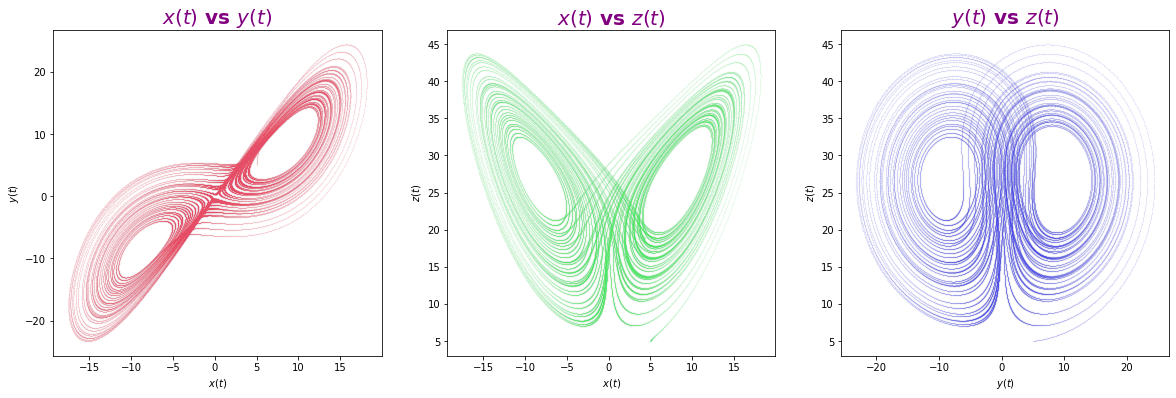

In [13]:
plt.rcParams["figure.figsize"]=20,6
fig, axs = plt.subplots(1, 3)

sizec = 0.1
for x, y, z in zip(C_n1[0], C_n1[1], C_n1[2]):
    axs[0].set_title('$x(t)$ vs $y(t)$', fontsize=20, color= 'purple', fontweight='bold')
    axs[0].plot([x], [y], color=(0.9, 0.3, 0.4, 0.8), marker='.', markersize=sizec, label='$(x(t),y(t))$') 
    axs[0].set(xlabel='$x(t)$', ylabel='$y(t)$')
    
    axs[1].set_title('$x(t)$ vs $z(t)$', fontsize=20, color= 'purple', fontweight='bold')
    axs[1].plot([x], [z], color=(0.3, 0.9, 0.4, 0.8), marker='.', markersize=sizec, label='$(x(t),z(t))$') 
    axs[1].set(xlabel='$x(t)$', ylabel='$z(t)$')
    
    axs[2].set_title('$y(t)$ vs $z(t)$', fontsize=20, color= 'purple', fontweight='bold')
    axs[2].plot([y], [z], color=(0.3, 0.3, 0.9, 0.8), marker='.', markersize=sizec, label='$(y(t),z(t))$') 
    axs[2].set(xlabel='$y(t)$', ylabel='$z(t)$')

Por último, observamos las solución $(x(t),y(t),z(t))$ en el espacio de tres dimensiones.

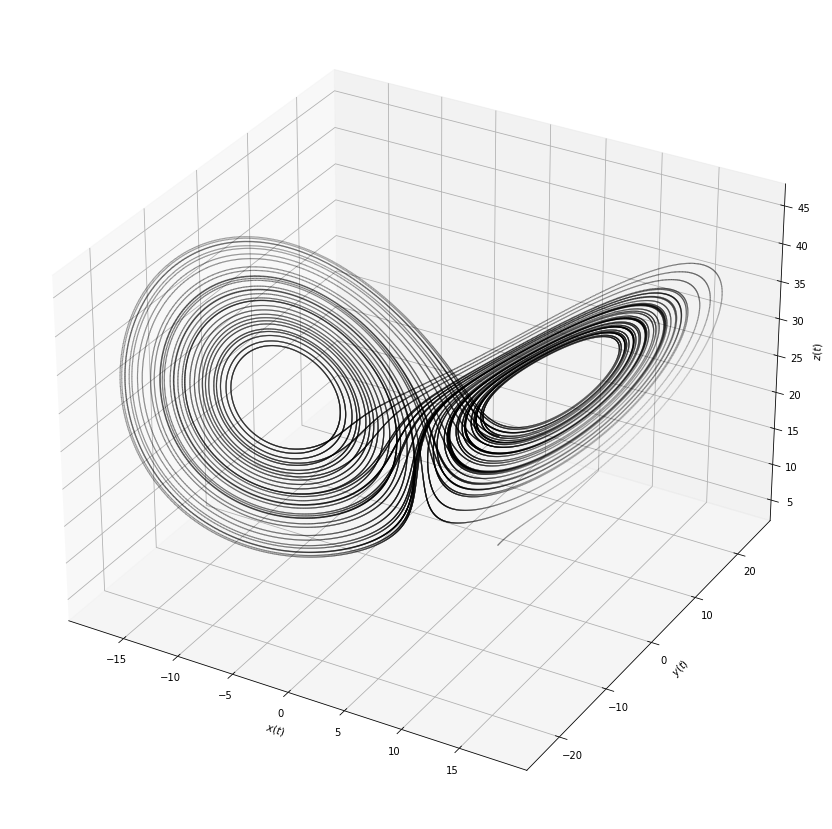

In [14]:
plt.rcParams["figure.figsize"]=15,15
ax = plt.axes(projection='3d')
sizec = list(itert.repeat(0.05, len(C_n1[0])))
ax.scatter3D(C_n1[0],C_n1[1],C_n1[2], color='k', s=sizec)
ax.set(xlabel='$x(t)$', ylabel='$y(t)$', zlabel='$z(t)$')
plt.show()